# First look at Retractions Data


## Preliminary Inspection


- Importing the required libraries and loading the data:

In [5]:

# Import required libraries

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [6]:

# Read data from .csv file 

df = pd.read_csv('retractions.csv', encoding='latin-1')

# Display header

df.head()


,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
0,52765,An integrated 3D model based face recognition ...,(B/T) Data Science;(B/T) Technology;,"Management Information System Department, Cypr...",Applied Nanoscience,Springer,Turkey,Ali Milad;Kamil Yurtkan,https://retractionwatch.com/2024/01/26/springe...,Research Article;,6/30/2023 0:00,10.1007/s13204-024-03010-9,0.0,2/3/2022 0:00,10.1007/s13204-021-02123-9,0.0,Correction,+Error in Text;+Updated to Retraction;,No,See also: https://pubpeer.com/publications/BCC...
1,52762,Convolutional neural network and Kalman filter...,(B/T) Data Science;(B/T) Technology;(PHY) Engi...,"Engineering Campus, School of Electrical and E...",Applied Nanoscience,Springer,Malaysia,Bushra N Alsunbuli;Widad Ismail;Nor M Mahyuddin,https://retractionwatch.com/2024/01/26/springe...,Research Article;,1/11/2024 0:00,10.1007/s13204-024-03006-5,0.0,9/17/2021 0:00,10.1007/s13204-021-02043-8,0.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,See also: https://pubpeer.com/publications/83D...
2,52761,Provide a new framework for blockchain-based i...,(B/T) Technology;,"Electrical and Computer Engineering, Altinbas ...",Applied Nanoscience,Springer,Turkey,Firas Hammoodi Neanah Al-mutar;Abdullahi Abdu ...,https://retractionwatch.com/2024/01/26/springe...,Research Article;,1/10/2024 0:00,10.1007/s13204-024-03023-4,0.0,2/3/2022 0:00,10.1007/s13204-021-02175-x,0.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,See also: https://pubpeer.com/publications/B48...
3,52760,Integration of Healthcare 4.0 and blockchain i...,(B/T) Technology;(HSC) Medicine - General;(HSC...,"Godwit Technologies, Pune, India; Business Inf...",Applied Nanoscience,Springer,India;Iraq;Turkey,Hemant B Mahajan;Ameer Sardar Rashid;Aparna A ...,NaN,Research Article;,1/14/2024 0:00,10.1007/s13204-024-03007-4,0.0,2/4/2022 0:00,10.1007/s13204-021-02164-0,35136707.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,See also: https://pubpeer.com/publications/347...
4,52759,A framework for adopting gamified learning sys...,(B/T) Technology;(SOC) Education;,Department of Electrical and Computer Engineer...,Applied Nanoscience,Springer,Turkey,Farazdaq Nahedh Alsamawi;Sefer Kurnaz,https://retractionwatch.com/2024/01/26/springe...,Research Article;,1/11/2024 0:00,10.1007/s13204-024-03028-z,0.0,6/16/2021 0:00,10.1007/s13204-021-01909-1,34155468.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,See also: https://pubpeer.com/publications/F2E...


- Obtaining fasic information about the data frame:

In [7]:

# Display info on data type and non-null entries per column

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52290 entries, 0 to 52289
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Record ID              52290 non-null  int64  
 1   Title                  52290 non-null  object 
 2   Subject                52290 non-null  object 
 3   Institution            52289 non-null  object 
 4   Journal                52290 non-null  object 
 5   Publisher              52290 non-null  object 
 6   Country                52290 non-null  object 
 7   Author                 52290 non-null  object 
 8   URLS                   28504 non-null  object 
 9   ArticleType            52290 non-null  object 
 10  RetractionDate         52290 non-null  object 
 11  RetractionDOI          51788 non-null  object 
 12  RetractionPubMedID     47117 non-null  float64
 13  OriginalPaperDate      52290 non-null  object 
 14  OriginalPaperDOI       49751 non-null  object 
 15  Or

- Quick NaN analysis:

<Axes: >

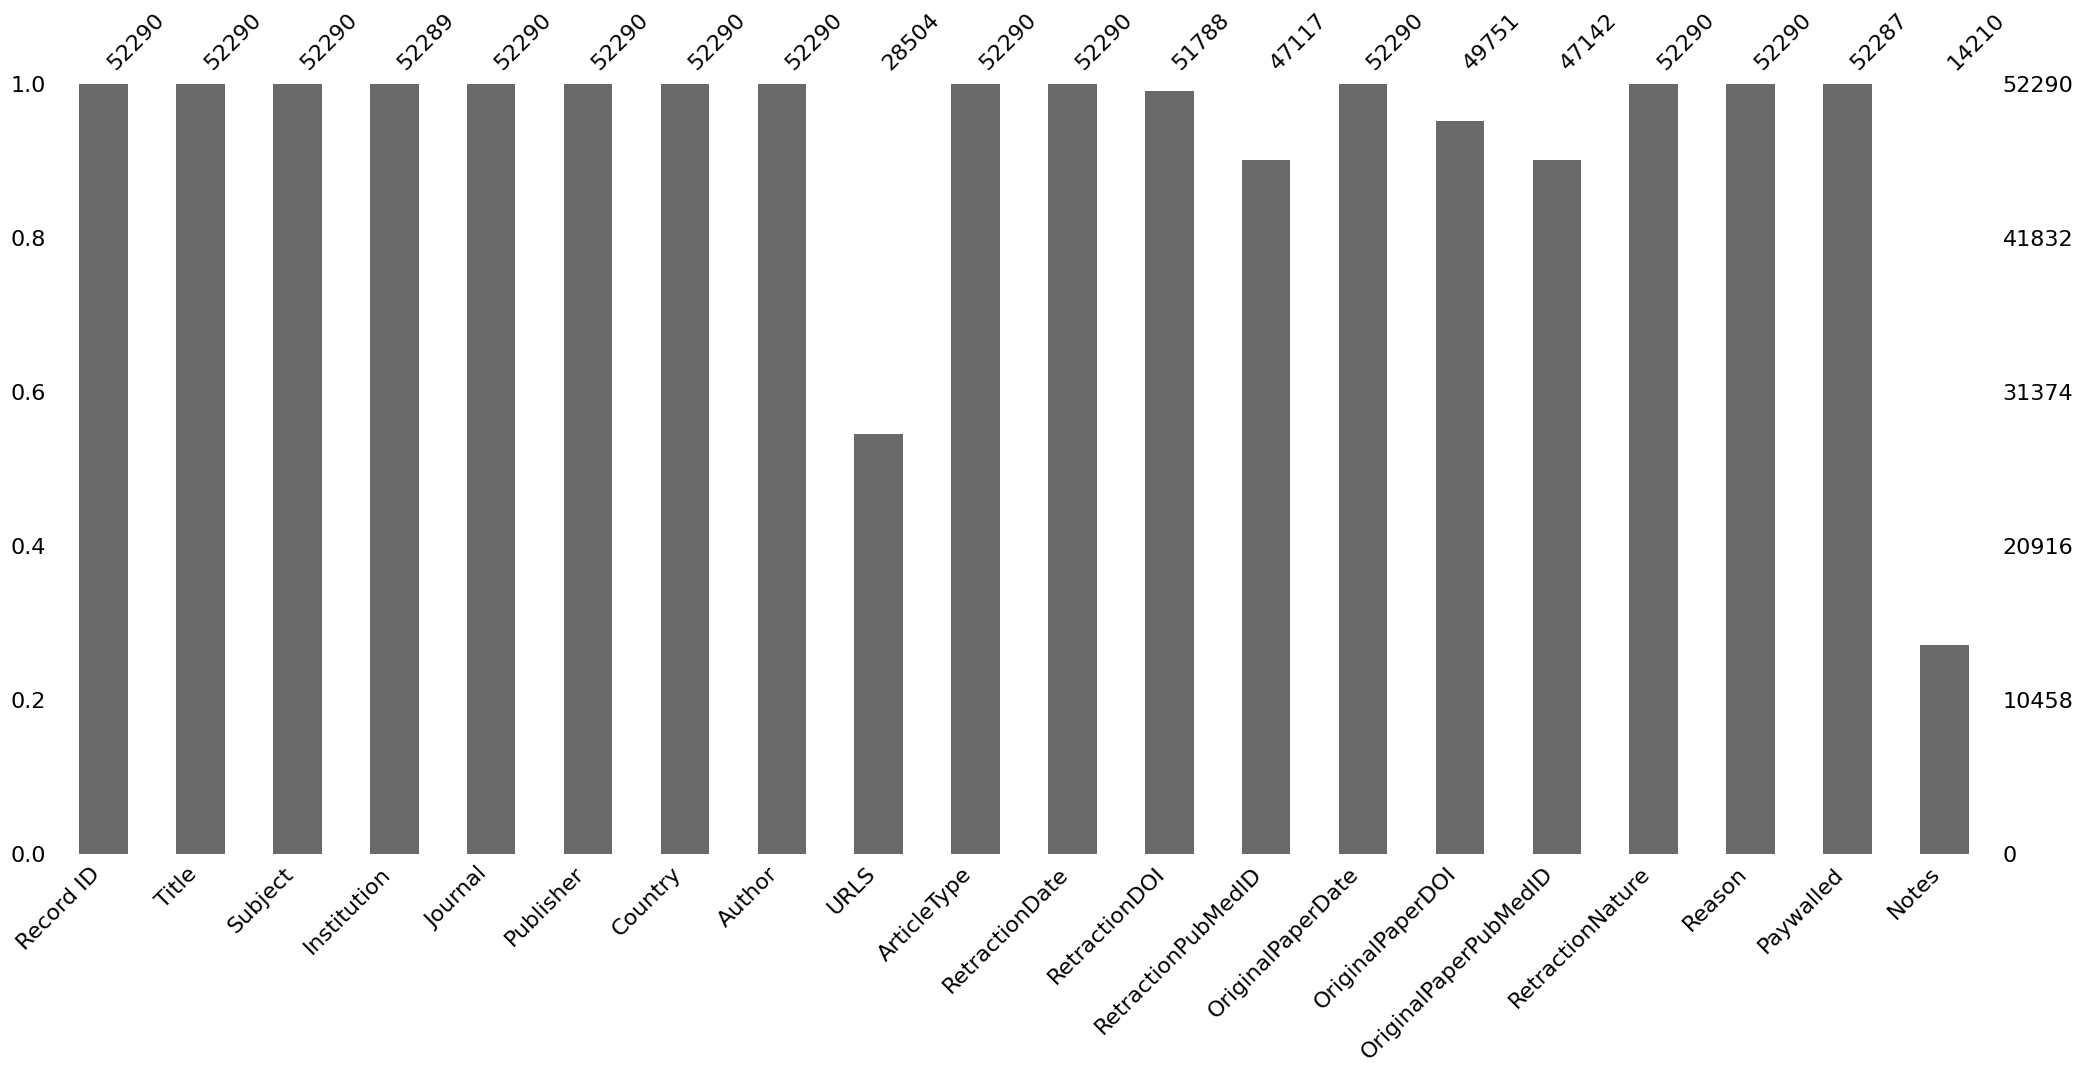

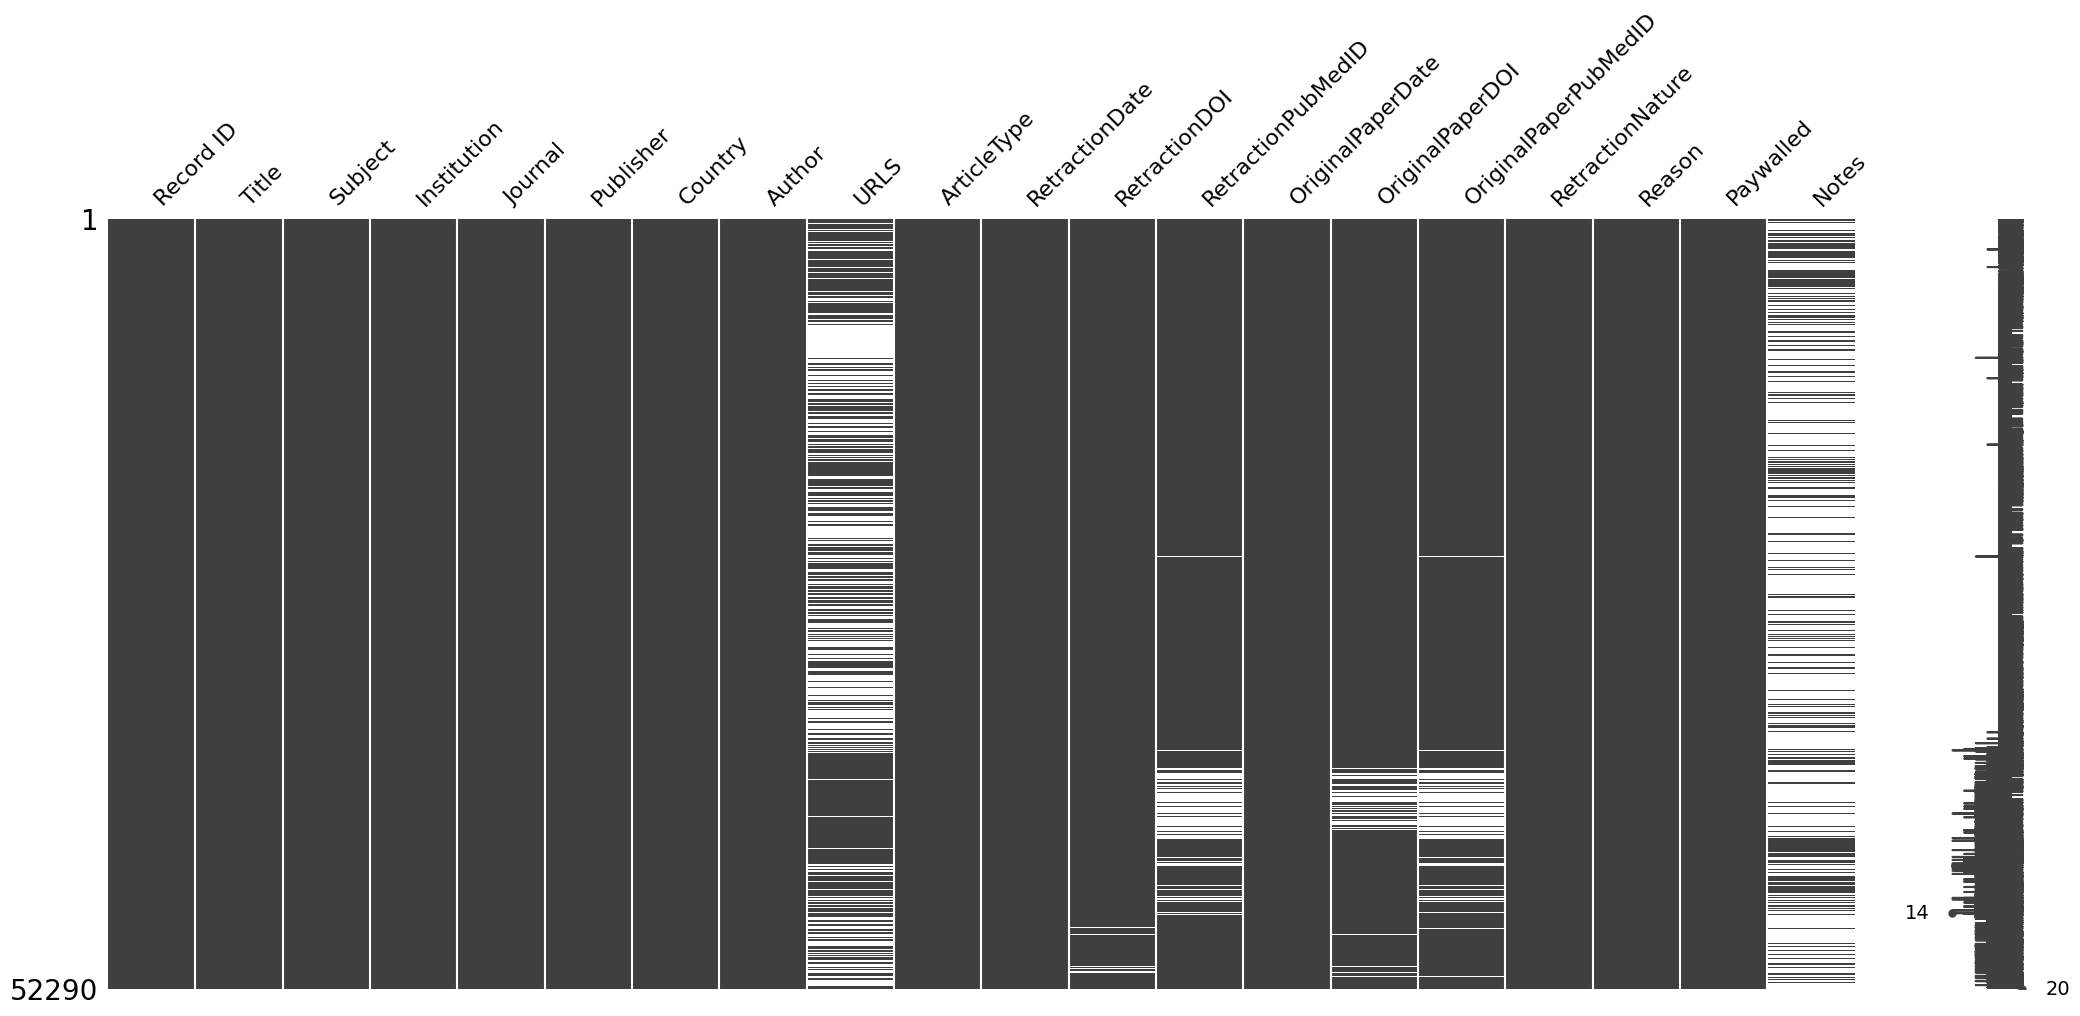

In [8]:

# Visualize NaNs per column using bars

msno.bar(df)

# Visualize NaNs per column using matrix

msno.matrix(df)

# Cleaning the Reasons Columns

- First I'm visualizing the number of unique entries in the Reasons column of the data set:

In [9]:

# Visualize number of unique values in Reason column

df.Reason.nunique()

8103

In [10]:
df.Reason

0                   +Error in Text;+Updated to Retraction;
1        +Concerns/Issues about Referencing/Attribution...
2        +Concerns/Issues about Referencing/Attribution...
3        +Concerns/Issues about Referencing/Attribution...
4        +Concerns/Issues about Referencing/Attribution...
                               ...                        
52285    +Falsification/Fabrication of Data;+Investigat...
52286       +Duplication of Image;+Manipulation of Images;
52287               +Duplication of Image;+Error in Image;
52288    +Duplication of Image;+Falsification/Fabricati...
52289           +Investigation by Third Party;+Withdrawal;
Name: Reason, Length: 52290, dtype: object

- As we can see, each "Reason" entry can contain more than one individual reason. So we need to do some data cleaning to find out how many individual reasons we really have in our data frame. 

- First I'm going to create a list with the supposedly unique values of the Reason column (which as we saw are really just different combinations of some more basic, individua reasons)

In [11]:

# Create list with unique values of Reason column

reasons = []
reasons = df.Reason.unique()

# Make sure list has desired type

reasons = reasons.tolist()

# Make sure it worked

type(reasons)


list

- Next I'm creating a function to break down each string of reasons in the "Reasons" column into those individual reasons and using it:

In [12]:

# Define function to separate reasons string into unique reasons

def reason_separator(reasons_list):
    individual_reasons = []
    remainder = []
    for reasons_string in reasons_list:
        if ";" in reasons_string:
            index = reasons_string.find(";")
            individual_reasons.append(reasons_string[1:index])
            remainder = reasons_string[index + 1:]
            individual_reasons.extend(reason_separator([remainder]))
        else:
            individual_reasons = reasons_string
            
    return individual_reasons
                

In [13]:

# Call function and store individual reasons in new list

individual_reasons = reason_separator(reasons)

- Those basic reasons for retractions are still repeated, so I create a function to get rid of duplicates and I use it:

In [14]:

# Define function to get rid of duplicate reasons

def unique_reasons_finder(reasons_list):
    aux_set = set(reasons_list)
    filtered_reasons = list(aux_set)
        
    return filtered_reasons

In [15]:

# Call function and store unique, non repeated reasons in list

unique_reasons = unique_reasons_finder(individual_reasons)

- We finally have the desired list of actual individual reasons for paper retraction, without duplicates:

In [16]:

# Obtain count of unique, non-repeated reasons

len(unique_reasons)

109

In [17]:

# Visualize unique, non-repeated reasons

unique_reasons

['Error by Third Party',
 'Plagiarism of Data',
 'Hoax Paper',
 'Complaints about Third Party',
 'Transfer of Copyright/Ownership',
 'Error in Methods',
 'Fake Peer Review',
 'Euphemisms for Misconduct',
 'Notice - Limited or No Information',
 'Retract and Replace',
 'Error in Results and/or Conclusions',
 'Lack of IRB/IACUC Approval',
 'Miscommunication by Author',
 'Duplication of Article',
 'Criminal Proceedings',
 'Breach of Policy by Author',
 'Duplication of Image',
 'Withdrawn (out of date)',
 'Date of Retraction/Other Unknown',
 'Concerns/Issues about Third Party Involvement',
 'Miscommunication by Third Party',
 'Updated to Retraction',
 'Concerns/Issues about Referencing/Attributions',
 'Contamination of Reagents',
 'Euphemisms for Duplication',
 'No Further Action',
 'Complaints about Company/Institution',
 'Plagiarism of Image',
 'Randomly Generated Content',
 'Miscommunication by Journal/Publisher',
 'Upgrade/Update of Prior Notice',
 'Civil Proceedings',
 'Misconduct by T

- Note that most of the reasons seem related to fraud, and that one of the reasons for retraction actually concerns the citing of retracted work.


## An Example of Fraudulent Work

- Next I'm going to obtain one example of fraudulent work to see if I can access the paper online:

In [18]:

# Obtain one example of fraudulent work

example = df.iloc[95]

# Visualize information for example

example

Record ID                                                            52661
Title                    Study on inventions of fresh food in commercia...
Subject                  (B/T) Business - Economics;(B/T) Technology;(B...
Institution              School of Information Technology, ShangQiu Nor...
Journal                  Acta Agriculturae Scandinavica, Section B â ...
Publisher                                               Taylor and Francis
Country                                                              China
Author                                                           Wei Wenji
URLS                     https://retractionwatch.com/2024/01/30/journal...
ArticleType                                              Research Article;
RetractionDate                                              1/30/2024 0:00
RetractionDOI                                10.1080/09064710.2024.2304398
RetractionPubMedID                                                     0.0
OriginalPaperDate        


- I could use the DOI identifier to find the paper online. You can download it at (I also uploaded the .pdf to the repo): 

https://www.tandfonline.com/doi/abs/10.1080/09064710.2021.1880625


As you can see, the paper is in English and the full text .pdf displays the word "RETRACTED" in the backgound. This is just one example, but it shows that accessing the full text of the retracted work will be possible at least sometimes.